In [1]:
import pandas as pd  #data processing-encoding, preprocess, cleaning
import numpy as np   #advanced computational 
import os            #path
import pathlib       #path
import cv2           #image processing
import tensorflow as tf   #model creation
from tensorflow import keras  #model creation

In [2]:
disease=['Covid','Pleural Effusion','Normal CT']

In [3]:
disease_label={name:index for index,name in enumerate(disease)}
disease_label

{'Covid': 0, 'Pleural Effusion': 1, 'Normal CT': 2}

In [4]:
import pickle 
with open("dict","wb") as file:
    pickle.dump(disease_label,file)

In [5]:
with open("dict","rb") as file:
    out=pickle.load(file)
    print(out)

{'Covid': 0, 'Pleural Effusion': 1, 'Normal CT': 2}


In [6]:
path="./CT Snapshot/"
os.listdir(path)

['Covid', 'Normal CT', 'Pleural Effusion']

In [7]:
data_dir=pathlib.Path(path)
data_dir

WindowsPath('CT Snapshot')

In [8]:
train_dict={
    name:list(data_dir.glob(f'{name}/*')) for name in disease
}
train_dict

{'Covid': [WindowsPath('CT Snapshot/Covid/1.jpeg'),
  WindowsPath('CT Snapshot/Covid/10.jpeg'),
  WindowsPath('CT Snapshot/Covid/11.jpeg'),
  WindowsPath('CT Snapshot/Covid/12.jpeg'),
  WindowsPath('CT Snapshot/Covid/13.jpeg'),
  WindowsPath('CT Snapshot/Covid/14.jpeg'),
  WindowsPath('CT Snapshot/Covid/15.jpg'),
  WindowsPath('CT Snapshot/Covid/16.jpg'),
  WindowsPath('CT Snapshot/Covid/2.jpeg'),
  WindowsPath('CT Snapshot/Covid/3.jpeg'),
  WindowsPath('CT Snapshot/Covid/4.jpeg'),
  WindowsPath('CT Snapshot/Covid/5.jpeg'),
  WindowsPath('CT Snapshot/Covid/6.jpeg'),
  WindowsPath('CT Snapshot/Covid/7.jpeg'),
  WindowsPath('CT Snapshot/Covid/8.jpeg'),
  WindowsPath('CT Snapshot/Covid/9.jpeg')],
 'Pleural Effusion': [WindowsPath('CT Snapshot/Pleural Effusion/005.jpeg'),
  WindowsPath('CT Snapshot/Pleural Effusion/01.jpeg'),
  WindowsPath('CT Snapshot/Pleural Effusion/02.jpeg'),
  WindowsPath('CT Snapshot/Pleural Effusion/03.jpeg'),
  WindowsPath('CT Snapshot/Pleural Effusion/03peg.jpg'),

In [9]:
x=[]
y=[]
for name,paths in train_dict.items():
    for image in paths:
        img=cv2.imread(str(image))
        img=cv2.resize(img,(244,244))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        x.append(img)
        y.append(disease_label[name])
print(x)
print(y)

[array([[[ 41,  41,  41],
        [ 44,  44,  44],
        [ 44,  44,  44],
        ...,
        [ 54,  54,  54],
        [ 45,  45,  45],
        [ 41,  41,  41]],

       [[ 39,  39,  39],
        [ 40,  40,  40],
        [ 43,  43,  43],
        ...,
        [ 42,  42,  42],
        [ 44,  44,  44],
        [ 34,  34,  34]],

       [[ 42,  42,  42],
        [ 41,  41,  41],
        [ 41,  41,  41],
        ...,
        [ 41,  41,  41],
        [ 43,  43,  43],
        [ 41,  41,  41]],

       ...,

       [[ 85,  85,  85],
        [ 90,  90,  90],
        [101, 101, 101],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[114, 114, 114],
        [108, 108, 108],
        [104, 104, 104],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[112, 112, 112],
        [110, 110, 110],
        [115, 115, 115],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  4,   4,   4]

In [10]:
x=np.array(x)
y=np.array(y)

In [11]:
x[0][0][0]

array([41, 41, 41], dtype=uint8)

In [12]:
x=x/255 #Scaling
# y=y/255


In [13]:
x[0]

array([[[0.16078431, 0.16078431, 0.16078431],
        [0.17254902, 0.17254902, 0.17254902],
        [0.17254902, 0.17254902, 0.17254902],
        ...,
        [0.21176471, 0.21176471, 0.21176471],
        [0.17647059, 0.17647059, 0.17647059],
        [0.16078431, 0.16078431, 0.16078431]],

       [[0.15294118, 0.15294118, 0.15294118],
        [0.15686275, 0.15686275, 0.15686275],
        [0.16862745, 0.16862745, 0.16862745],
        ...,
        [0.16470588, 0.16470588, 0.16470588],
        [0.17254902, 0.17254902, 0.17254902],
        [0.13333333, 0.13333333, 0.13333333]],

       [[0.16470588, 0.16470588, 0.16470588],
        [0.16078431, 0.16078431, 0.16078431],
        [0.16078431, 0.16078431, 0.16078431],
        ...,
        [0.16078431, 0.16078431, 0.16078431],
        [0.16862745, 0.16862745, 0.16862745],
        [0.16078431, 0.16078431, 0.16078431]],

       ...,

       [[0.33333333, 0.33333333, 0.33333333],
        [0.35294118, 0.35294118, 0.35294118],
        [0.39607843, 0

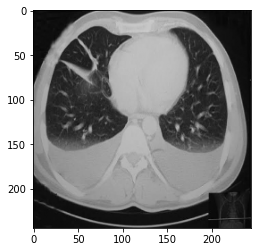

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x[18])

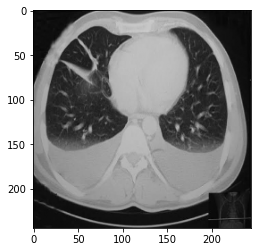

In [15]:
plt.imshow(x[18])

In [16]:
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.1,input_shape=(244,244,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomFlip('horizontal')
])  #for error in data

In [18]:
#CNN-Convolutional neural network
model=keras.Sequential([
#     data_augmentation, #layer1
    keras.layers.Conv2D(16,3,padding='same',activation='relu'), #convolutional layer
    keras.layers.MaxPool2D(),                                    #maxpooling layer
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    #244 * 244 = 59536*1
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'), #neuron1
    keras.layers.Dense(64,activation='relu'),  #neuron2
    keras.layers.Dense(len(disease),activation=keras.activations.softmax) ##neuron3
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [19]:
model.fit(x,y,epochs=10) #training model

Epoch 1/10
2/2 [==============================] - 1s 296ms/step - loss: 1.1934 - sparse_categorical_accuracy: 0.2449
Epoch 2/10
2/2 [==============================] - 1s 296ms/step - loss: 1.0169 - sparse_categorical_accuracy: 0.6939
Epoch 3/10
2/2 [==============================] - 1s 302ms/step - loss: 0.3374 - sparse_categorical_accuracy: 0.9592
Epoch 4/10
2/2 [==============================] - 1s 288ms/step - loss: 0.1423 - sparse_categorical_accuracy: 0.9592
Epoch 5/10
2/2 [==============================] - 1s 315ms/step - loss: 0.0571 - sparse_categorical_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 1s 279ms/step - loss: 0.0196 - sparse_categorical_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 1s 302ms/step - loss: 0.0163 - sparse_categorical_accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 1s 299ms/step - loss: 0.0019 - sparse_categorical_accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 1s 292ms/step 

In [20]:
tf.keras.models.save_model(model,"my_model.hdf5")

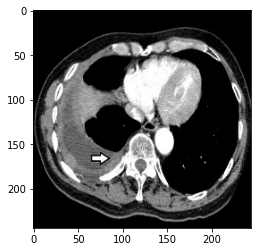

In [21]:
image_path="./pe.jpeg"
x_test=[]
test_image=cv2.imread(image_path)
img=cv2.resize(test_image,(244,244))
plt.imshow(img)
x_test.append(img)

In [22]:
x_test=np.array(x_test)

In [ ]:
x_test.shape

In [ ]:
x_test=x_test/255

In [ ]:
plt.imshow(x_test[0])

In [24]:
load_model=tf.keras.models.load_model('my_model.hdf5')


In [25]:
predicted=load_model.predict(x_test)

In [26]:
np.argmax(predicted)

1